## STYLECLIP inference

In [ ]:
cd /content/drive/MyDrive/Github/StyleCLIP-main/

/content/drive/MyDrive/Github/StyleCLIP-main


In [ ]:
!pip install ftfy regex tqdm gdown
!pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.10
    Uninstalling wcwidth-0.2.10:
      Successfully uninstalled wcwidth-0.2.10


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-x3p0d34q
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-x3p0d34q
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Using cached torch-1.11.0-cp310-cp310-manylinux1_x86_64.whl (750.6 MB)
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369500 sha256=6ceec4f2d2d160b2f3b9243befb218edf97140d7792c31aeb0609fd3b12323da
  Stored in directory: /tmp/pip-ephem-wheel-cache-4lzg5n07/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0
    Uninstalling torch-2.1.0:
      Successfully uninstalled torch-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followin

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# downloads StyleGAN's weights and facial recognition network weights
ids = ['1EM87UquaoQmk17Q8d5kYIAHqu0dkYqdT', '1N0MZSqPRJpLfP4mFQCS14ikrVSe8vQlL']
for file_id in ids:
  downloaded = drive.CreateFile({'id':file_id})
  downloaded.FetchMetadata(fetch_all=True)
  downloaded.GetContentFile(downloaded.metadata['title'])

In [ ]:
experiment_type = 'edit' #@param ['edit', 'free_generation']

description = 'crying face' #@param {type:"string"}

latent_path = None #@param {type:"string"}

optimization_steps = 200 #@param {type:"number"}

l2_lambda = 0.003 #@param {type:"number"}

id_lambda = 0.005 #@param {type:"number"}

stylespace = False #@param {type:"boolean"}

create_video = False #@param {type:"boolean"}

In [ ]:
use_seed = True #@param {type:"boolean"}

seed = 1 #@param {type: "number"}

In [ ]:
args = {
    "description": description,
    "ckpt": "stylegan2-ffhq-config-f.pt",
    "stylegan_size": 1024,
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "mode": experiment_type,
    "l2_lambda": l2_lambda,
    "id_lambda": id_lambda,
    'work_in_stylespace': stylespace,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 10,
    "results_dir": "results",
    "ir_se50_weights": "model_ir_se50.pth"
}

In [ ]:
if use_seed:
  import torch
  torch.manual_seed(seed)
from optimization.run_optimization import main
from argparse import Namespace
result = main(Namespace(**args))

Loading ResNet ArcFace


loss: 0.8276;:   0%|          | 0/200 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:63: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  warnings.warn(
loss: 0.7344;: 100%|██████████| 200/200 [01:25<00:00,  2.33it/s]


In [ ]:
#@title Visualize Result
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))


/usr/local/lib/python3.10/dist-packages/torchvision/utils.py:63: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  warnings.warn(


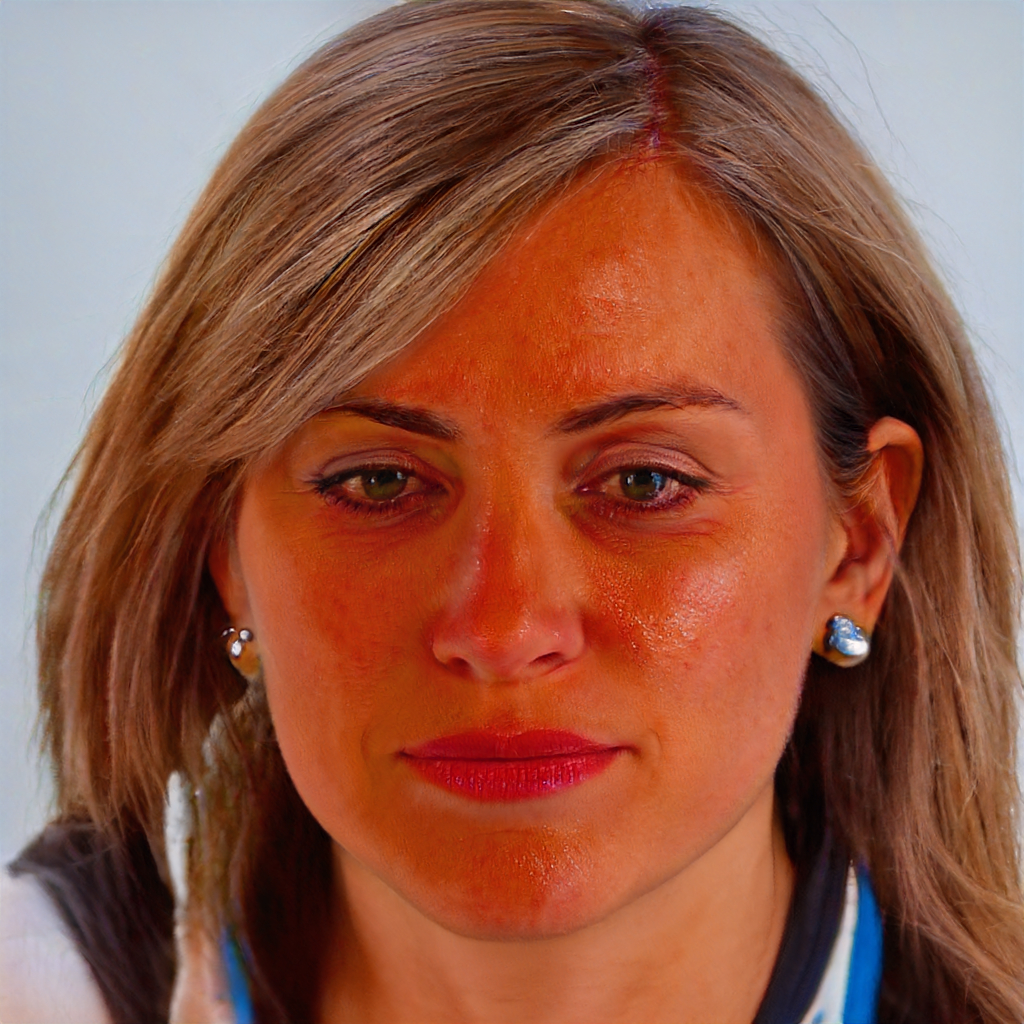

In [ ]:
result_image

## StyleMASK


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Github/StyleMask-master

/content/drive/MyDrive/Github/StyleMask-master


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=59255585d33c11faa149c2f4cdb476aeb84bde82b6f93d7a4f150b259b1ddc0b
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58264 sha256=5

In [ ]:
!pip install torch
!pip install torchvision
!pip install torchaudio
!pip install fvcore iopath
!pip install wandb
!pip install face-alignment
!pip install kornia==0.4.1
!pip install gdown
!pip install chumpy
!pip install Ninja
!pip install face-alignment==1.3.4


In [ ]:
!pip install torchvision==0.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu118
    Uninstalling torch-2.1.0+cu118:
      Successfully uninstalled torch-2.1.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.0+cu118
    Uninstalling torchvision-0.16.0+cu118:
      Successfully uninstalled torchvision-0.16.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu118 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.


In [ ]:
!pip3 install https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu118_pyt210/pytorch3d-0.7.5-cp310-cp310-linux_x86_64.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 45.6 MB/s eta 0:00:00


In [ ]:
!pip install torch==2.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!python run_trainer.py --experiment_path ./training_attempts/exp_v00 --batch_size 1 --max_iter 1000

Traceback (most recent call last):
  File "/content/drive/MyDrive/Github/StyleMask-master/run_trainer.py", line 11, in <module>
    from libs.trainer import Trainer
  File "/content/drive/MyDrive/Github/StyleMask-master/libs/trainer.py", line 20, in <module>
    from libs.models.StyleGAN2.model import Generator as StyleGAN2Generator
  File "/content/drive/MyDrive/Github/StyleMask-master/libs/models/StyleGAN2/model.py", line 8, in <module>
    from .op import FusedLeakyReLU, fused_leaky_relu, upfirdn2d
  File "/content/drive/MyDrive/Github/StyleMask-master/libs/models/StyleGAN2/op/__init__.py", line 1, in <module>
    from .fused_act import FusedLeakyReLU, fused_leaky_relu
  File "/content/drive/MyDrive/Github/StyleMask-master/libs/models/StyleGAN2/op/fused_act.py", line 10, in <module>
    fused = load(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1308, in load
    return _jit_compile(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cp

In [ ]:
cd /content/drive/MyDrive/Github/StyleMask-master

/content/drive/MyDrive/Github/StyleMask-master


In [ ]:
result_image.save('/content/drive/MyDrive/Github/StyleMask-master/images/target_image.jpg')

In [ ]:
!python run_inference.py --output_path ./results --save_grid

----- Load generator from ./pretrained_models/stylegan2-ffhq-config-f_1024.pt -----
----- Load mask network from /content/drive/MyDrive/Github/StyleMask-master/pretrained_models/mask_network_1024.pt -----
Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100% 85.7M/85.7M [00:05<00:00, 17.1MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100% 91.9M/91.9M [00:03<00:00, 25.0MB/s]
----- Load e4e encoder from ./pretrained_models/e4e_ffhq_encode_1024.pt -----
Reenact 1 pairs
100% 1/1 [00:28<00:00, 28.28s/it]
